<a href="https://colab.research.google.com/github/sagar2582/Data-Mining---Models-/blob/main/Team_12_Assement_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mangement and Mining - Group Assessment

### Assessment Instructions: Analysing, Processing, and Modeling Financial Transaction Data

Your team has been given access to a dataset containing financial transaction data. Your goal is to analyze, process, and model this data to identify patterns, trends, and potential fraud.Once completed you will need to submit this notebook and an accompanying model file for assessment (See Assessment Brief Section 2 Part 1). Once an initial submission has been made groups should focus on improving the model and the analysis, then resubmit the updated notebook and model file (See Assessment Brief section 2 Part 2). The final submission should also include a short reflective summary, outlining the changes made and the reasons for these changes (See assessment brief Section 2 Part 2).

### Assessment Dataset

The dataset provided for the assessment contains a sample of financial transactions, made by customers. The features of the dataset are described below, they mainly include information about the transaction and the customer involved in the transaction. The dataset also contains a binary target variable called 'Is.Fraudulent', which indicates whether the transaction is fraudulent or not. The goal of the assessment is to build a model that can predict whether a transaction is fraudulent or not based on the features provided in the dataset and any additional features that you may create.

| Variable          | Data Type     | Description             |
|-------------------|---------------|-------------------------|
| Transaction.Date   | object        | The date of the transaction. |
| Transaction.Amount | float64       | The amount of money involved. |
| Customer.Age      | int64         | The age of the customer.    |
| Account.Age.Days  | int64         | The number of days since opened. |
| Transaction.Hour  | int64         | The hour of day during transaction. |
| source            | object        | The source of the transaction.|
| browser           | object        | The browser used for transaction.|
| Payment.Method   | object        | The payment method used.    |
| Product.Category | object        | The category of product purchased.|
| Quantity          | int64         | The number of units purchased.|
| Device.Used       | object        | The device used to make transaction.|
| Is.Fraudulent     | int64         | A flag indicating fraudulent status.|


### Assessment Template

The template provided below is a guide to help you structure your analysis. You can add additional code and text cells to the template as needed. There are cells and code throughout the template which you should not modify, these are required to ensure the assessment can be marked successfully. The cells or code you should not modify will be clearly labeled. Please ensure you save a copy of the template to your local machine before you start your analysis.

### Assessment Submission

In [ ]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report
from sklearn.metrics import f1_score

In [ ]:
# load the data
import pandas as pd

# load the data
df = pd.read_csv('student_dataset.csv')

# print the first 5 rows of the data
df.head()

,Transaction.Date,Transaction.Amount,Customer.Age,Account.Age.Days,Transaction.Hour,source,browser,Payment.Method,Product.Category,Quantity,Device.Used,Is.Fraudulent
0,2015-05-28 11:15:16,45.00,37,35,11,Ads,Chrome,PayPal,electronics,5,tablet,0
1,2015-04-03 03:39:44,15.00,33,44,3,Direct,FireFox,debit card,health & beauty,5,tablet,1
2,2015-08-31 23:01:21,54.00,19,44,23,SEO,Opera,debit card,health & beauty,1,mobile,0
3,2024-03-10 17:02:40,234.42,23,107,17,Ads,Chrome,bank transfer,electronics,5,tablet,0
4,2024-03-30 08:15:29,412.49,23,220,8,Ads,Safari,bank transfer,toys & games,4,mobile,0


In [ ]:
rows = df.shape[0]
columns = df.shape[1]

print(f"Our dataset has {rows} and {columns} columns")

Our dataset has 240000 and 12 columns


In [ ]:
# Check for Null values and sorting in decesding order

df.isnull().sum().sort_values(ascending = False)

,0
Transaction.Date,0
Transaction.Amount,0
Customer.Age,0
Account.Age.Days,0
Transaction.Hour,0
source,0
browser,0
Payment.Method,0
Product.Category,0
Quantity,0


Our data contains no Null values, We will be placing a filter to remove any possible Null Value for the assesment dataset.

In [ ]:
# Check for Duplicate values

len(df[df.duplicated()])

0

Great!! We have no duplicates. But we will place a filter to remove any possible duplicate in the assesment dataset

In [ ]:
# Changing column names, replacing '.' with '_'

df = df.rename(columns={
    'Transaction.Date': 'Transaction_Date',
    'Transaction.Amount': 'Transaction_Amount',
    'Customer.Age': 'Customer_Age',
    'Account.Age.Days': 'Account_Age_Days',
    'Transaction.Hour': 'Transaction_Hour',
    'Payment.Method': 'Payment_Method',
    'Product.Category': 'Product_Category',
    'Device.Used': 'Device_Used',
    'Is.Fraudulent': 'Is_Fraudulent'
})

In [ ]:
# Inspecting our Traget Variable

df.Is_Fraudulent.unique()

array([0, 1])

In [ ]:
df['Is_Fraudulent'].value_counts()

,count
Is_Fraudulent,
0,222718
1,17282


### From the above Data Inspection we gathered the following insight:

1. Our dataset contains 240,000 records and 12 columns
2. The target variable (Is_Fraudulent) has two unique values (0 and 1), indicating a binary classification problem.
3. The dataset is imbalanced, wi
•	222,718 non-fraudulent transactions  and
•	17,282 fraudulent transactions. )
•	Fraudulent transactions make up ~7.2% of the total d4ta.
4. The dataset contains zero NULL values, ensuring completeness with no missing data handling requi5ed.
5. The dataset contains zero duplicate values, ensuring uniqueness and avoiding redundancy in transact6ons.
6. Column names were standardised by replacing . with _, ensuring consistency in variable naming.

# Exploratory Data Analysis
visulaizing the dataset for beter understanding

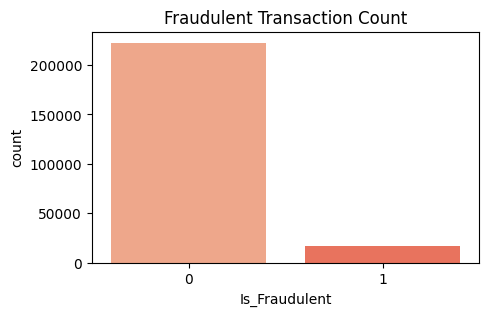

In [ ]:
# Plotting a countplot for our Target Variable

# Defining warm theme
warm_palette = ['#FFA07A', '#FF6347']

plt.figure(figsize=(5,3))
ax = sns.countplot(x='Is_Fraudulent', data=df, hue='Is_Fraudulent', palette=warm_palette)
ax.legend_.remove()
plt.title('Fraudulent Transaction Count')
plt.show()

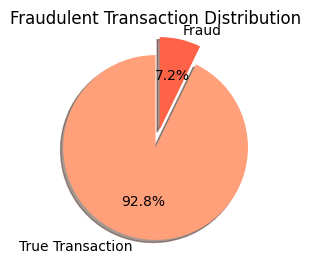

In [ ]:
# Plotting a pie chart for our Targert Variable

price_labels = ['True Transaction', 'Fraud']
data = df['Is_Fraudulent'].value_counts()

# Defining warm theme
warm_colors = ['#FFA07A', '#FF6347']

# Creating the plot
fig = plt.figure(figsize=(5, 3))
plt.pie(data, labels=price_labels, autopct='%1.1f%%', explode=(0.0, 0.2),
        shadow=True, startangle=90, colors=warm_colors)
plt.title('Fraudulent Transaction Distribution')
plt.show()

# Outlier Detection
In our dataframe we have some categorical features as well so we are creating a list of features which are numeric outlier detection, creating box plot for all numeric features.


In [ ]:
List_of_numerics = ['Transaction_Amount', 'Customer_Age', 'Account_Age_Days', 'Quantity', 'Transaction_Hour']

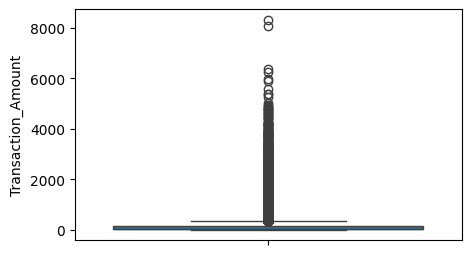

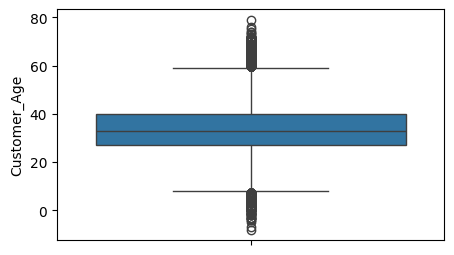

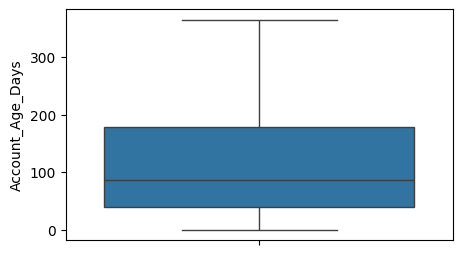

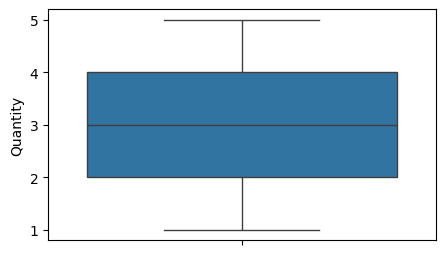

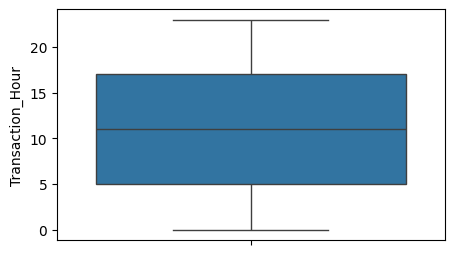

In [ ]:
#creating boxplot for outlier detection

for col in List_of_numerics:
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[col])

We have outliers in transaction amount and customer age, We will e adding the same steps in cleaning function for evaluating dataset.

In [ ]:
# Finding Q1, Q3 and IQR for 'transaction amount', we will remove outliers to avoid any baisness in our predictions.

Q1_tAmount =  df['Transaction_Amount'].quantile(0.25) #25%
Q3_tAmount = df['Transaction_Amount'].quantile(0.75) # 75%
IQR_tAmount = Q3_tAmount - Q1_tAmount

In [ ]:
# The outlier values of transaction amount

df[(df['Transaction_Amount'] < Q1_tAmount-1.5*IQR_tAmount ) | (df['Transaction_Amount'] > Q3_tAmount+1.5*IQR_tAmount)]['Transaction_Amount']

,Transaction_Amount
4,412.49
10,537.66
18,1394.43
19,367.67
30,409.65
...,...
239936,809.62
239951,404.79
239974,734.33
239975,504.66


In [ ]:
# Counting the Outliers in Transaction amount

print(df[(df['Transaction_Amount'] < Q1_tAmount-1.5*IQR_tAmount ) | (df['Transaction_Amount'] > Q3_tAmount+1.5*IQR_tAmount)]['Transaction_Amount'].count())

24854


In [ ]:
# Finding Q1, Q3 and IQR for 'Customer_Age', we will remove outliers to avoid any baisness in our predictions.

Q1_age =  df['Customer_Age'].quantile(0.25) #25%
Q3_age = df['Customer_Age'].quantile(0.75) # 75%
IQR_age = Q3_age - Q1_age

In [ ]:
# The outlier values of transaction amount

df[(df['Customer_Age'] < Q1_age-1.5*IQR_age ) | (df['Customer_Age'] > Q3_age+1.5*IQR_age)]['Customer_Age']

,Customer_Age
61,2
263,60
454,5
464,0
599,65
...,...
239805,7
239839,7
239922,4
239965,60


In [ ]:
# Counting the Outliers in Transaction amount

print(df[(df['Customer_Age'] < Q1_age-1.5*IQR_age) | (df['Customer_Age'] > Q3_age+1.5*IQR_age)]['Customer_Age'].count())

1466


In [ ]:
# Removing outliers from our data set

outliers_tAmount = (df['Transaction_Amount'] >= Q1_tAmount - 1.5 * IQR_tAmount) & (df['Transaction_Amount'] <= Q3_tAmount + 1.5 *IQR_tAmount)
df = df.loc[outliers_tAmount]

outliers_age = (df['Customer_Age'] >= Q1_age - 1.5 * IQR_age) & (df['Customer_Age'] <= Q3_age + 1.5 *IQR_age)
df = df.loc[outliers_age]

In [ ]:
df['Is_Fraudulent'].value_counts()

,count
Is_Fraudulent,
0,199199
1,14712


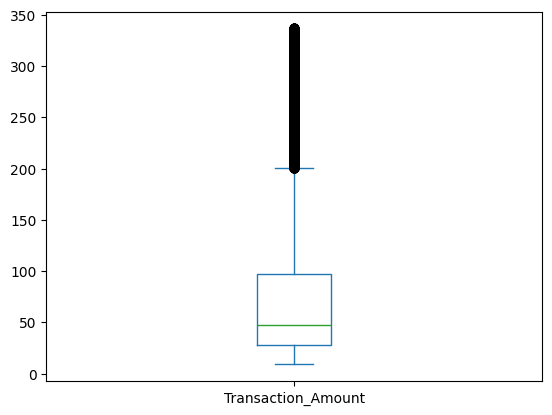

In [ ]:
df['Transaction_Amount'].plot(kind='box')
plt.show()

### Insights - After removing the outliers we have 199,199 (0) True Transactions and 14,712 (1) False Transactions

## Converting date column to date time and extracting day,month and year

In [ ]:
# Converting datatype of "Transaction_Date" column using mixed formats
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='mixed', dayfirst=True)

# Creating new columns: extracting day, month, year, and the name of the day from Transaction_Date
df['day'] = df['Transaction_Date'].dt.day
df['month'] = df['Transaction_Date'].dt.month
df['year'] = df['Transaction_Date'].dt.year
df['name_of_day'] = df['Transaction_Date'].dt.day_name()

In [ ]:
df.head(2)

,Transaction_Date,Transaction_Amount,Customer_Age,Account_Age_Days,Transaction_Hour,source,browser,Payment_Method,Product_Category,Quantity,Device_Used,Is_Fraudulent,day,month,year,name_of_day
0,2015-05-28 11:15:16,45.0,37,35,11,Ads,Chrome,PayPal,electronics,5,tablet,0,28,5,2015,Thursday
1,2015-04-03 03:39:44,15.0,33,44,3,Direct,FireFox,debit card,health & beauty,5,tablet,1,3,4,2015,Friday


In [ ]:
# Dropping the 'Transaction_Date' column

df.drop('Transaction_Date',axis=1,inplace=True)

## Distribution of features - Numerical Columns

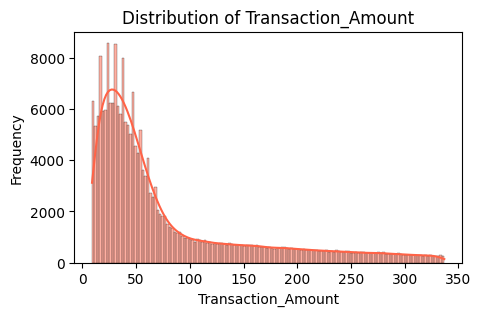

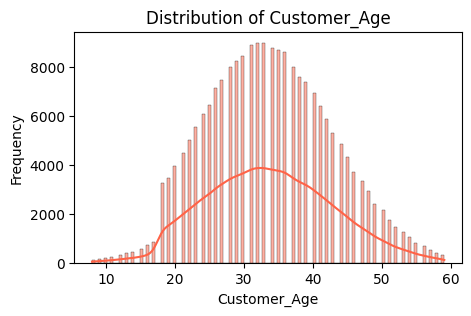

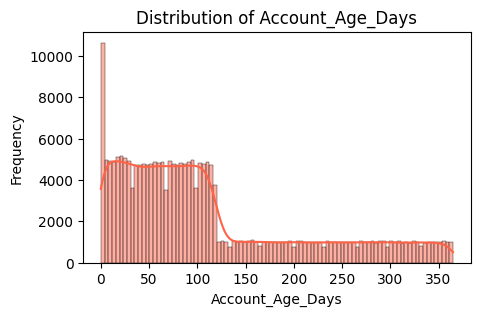

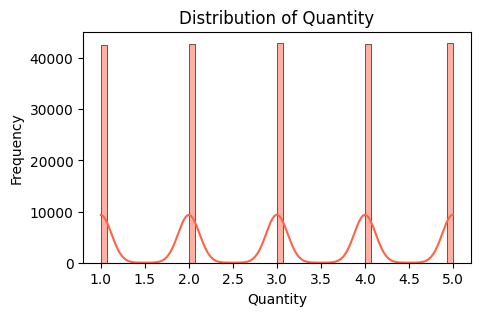

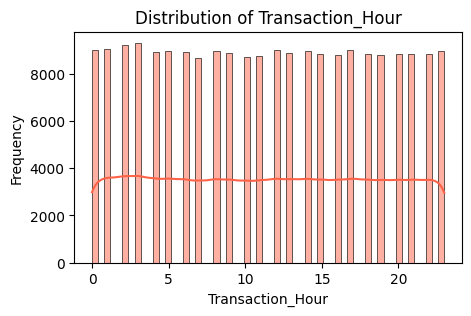

In [ ]:
# Iterate over each numeric feature to plot its histogram
for col in List_of_numerics:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=df, x=col, kde=True, color='#FF6347')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Insights- Customer Transaction is positively skewed and the customer age is uniformly distributed
We will use log transformation on Transtion_Amount before moving forward


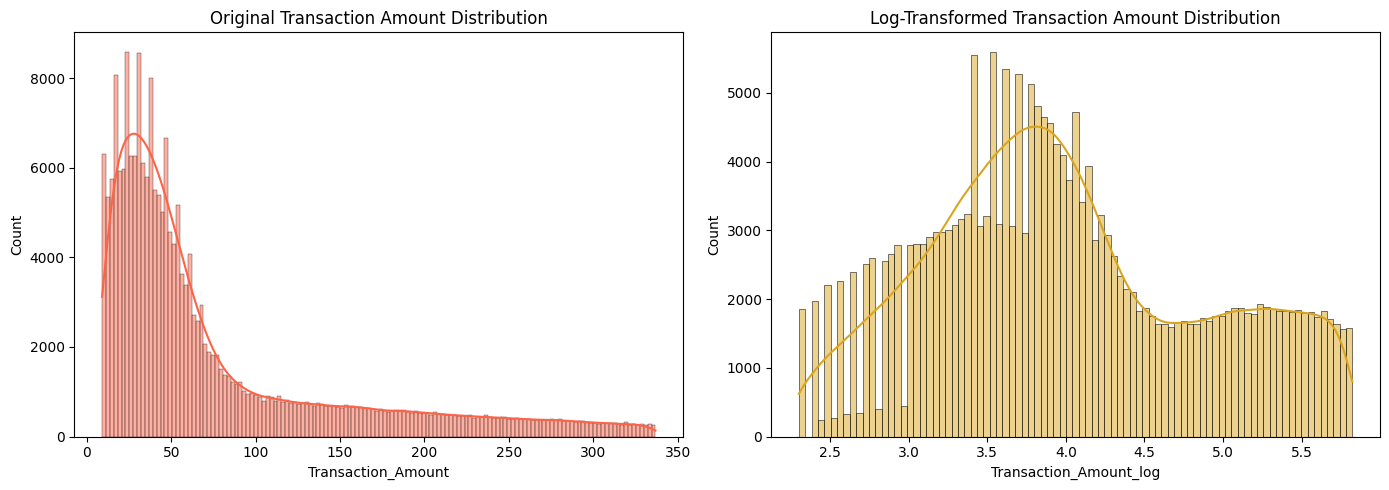

In [ ]:
# Apply log transformation to Transaction_Amount
df['Transaction_Amount_log'] = np.log1p(df['Transaction_Amount'])

# Plot before and after transformation to visualize the effect
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Transaction_Amount'], kde=True, ax=axes[0], color='tomato')
axes[0].set_title("Original Transaction Amount Distribution")
sns.histplot(df['Transaction_Amount_log'], kde=True, ax=axes[1], color='goldenrod')
axes[1].set_title("Log-Transformed Transaction Amount Distribution")

plt.tight_layout()
plt.show()

**We will drop the 'Transaction_Amount', now that we have Log-transformed Amount Distribution**

**Monthly Trends**

month
1     4407966.38
2     4080743.06
3     4399310.07
4      793733.42
5      563307.00
6      549790.00
7      568578.00
8      550050.00
9      423180.00
10     288480.00
11     138149.00
12      17569.00
Name: Transaction_Amount, dtype: float64


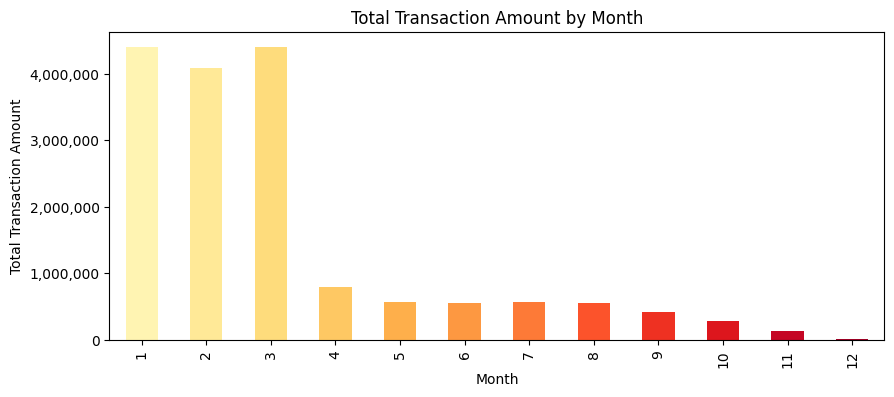

In [ ]:
# Determine the number of unique months
unique_months = df['month'].nunique()
warm_palette = sns.color_palette("YlOrRd", unique_months)

# Group data by month and sum Transaction_Amount
monthly_sum = df.groupby('month')['Transaction_Amount'].sum()
print(monthly_sum)  # Verify the aggregated values

plt.figure(figsize=(10,4))
plt.title("Total Transaction Amount by Month")

# Plot the bar chart and format y-axis tick labels if needed
ax = monthly_sum.plot(kind='bar', color=warm_palette)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.show()

**Insights** Unsure for the reason but, there seems be a lot of spending in the first three months which reduces drastically for the months

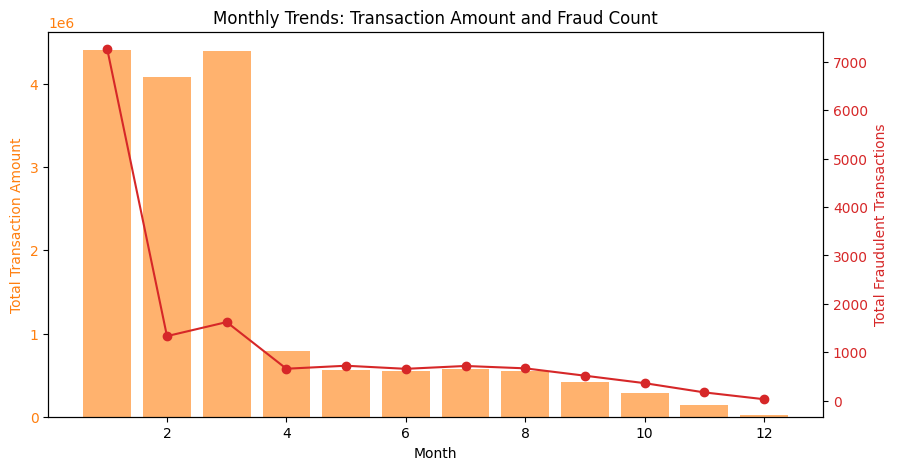

In [ ]:
monthly_data = df.groupby('month').agg({
    'Transaction_Amount': 'sum',
    'Is_Fraudulent': 'sum'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:orange'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Transaction Amount', color=color)
ax1.bar(monthly_data['month'], monthly_data['Transaction_Amount'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Fraudulent Transactions', color=color)
ax2.plot(monthly_data['month'], monthly_data['Is_Fraudulent'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Monthly Trends: Transaction Amount and Fraud Count")
plt.show()


**Insight** - Most amount of frauds took place in the first month crossing over 700 and remained constant from month 4 to month 12th i.e., April to December.

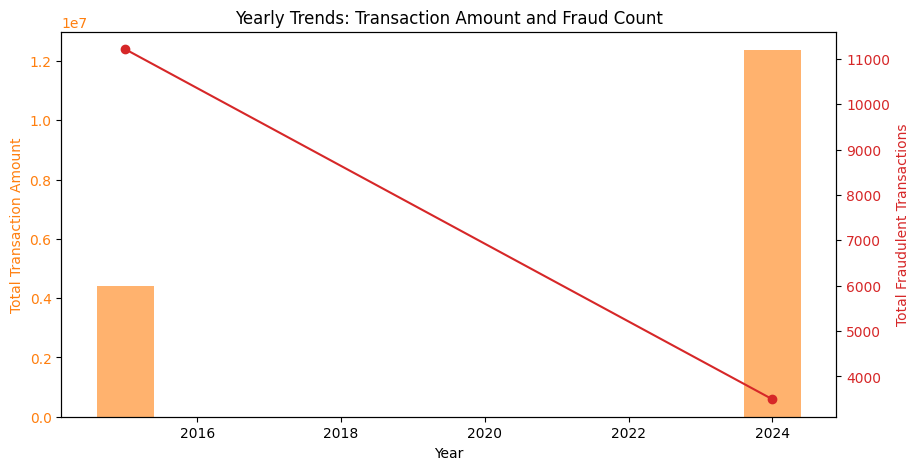

In [ ]:
yearly_data = df.groupby('year').agg({
    'Transaction_Amount': 'sum',
    'Is_Fraudulent': 'sum'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Transaction Amount', color=color)
ax1.bar(yearly_data['year'], yearly_data['Transaction_Amount'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Fraudulent Transactions', color=color)
ax2.plot(yearly_data['year'], yearly_data['Is_Fraudulent'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Yearly Trends: Transaction Amount and Fraud Count")
plt.show()

**Insights** - We can see there is missing data from 2016 - 2023, It can be for evaluation data test. But we can see the number of frauds in 2015 were 3 times higher than 2024.

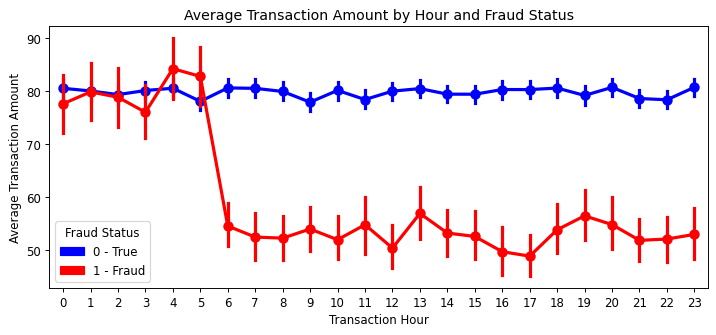

In [ ]:
palette = {0: "blue", 1: "red"}

plt.figure(figsize=(10,4), dpi=85)
ax = sns.pointplot(data=df, x="Transaction_Hour", y="Transaction_Amount", hue="Is_Fraudulent", palette=palette)
plt.title("Average Transaction Amount by Hour and Fraud Status")
plt.xlabel("Transaction Hour")
plt.ylabel("Average Transaction Amount")

# Remove the automatic legend
ax.legend_.remove()

# Create custom legend handles with the desired labels
patch_true = mpatches.Patch(color=palette[0], label='0 - True')
patch_fraud = mpatches.Patch(color=palette[1], label='1 - Fraud')
plt.legend(handles=[patch_true, patch_fraud], title="Fraud Status")

plt.show()

**Insights** There is an unsual amount of Fraud transaction from hour '0' - hour '4'. Fraud spikes in night hours.


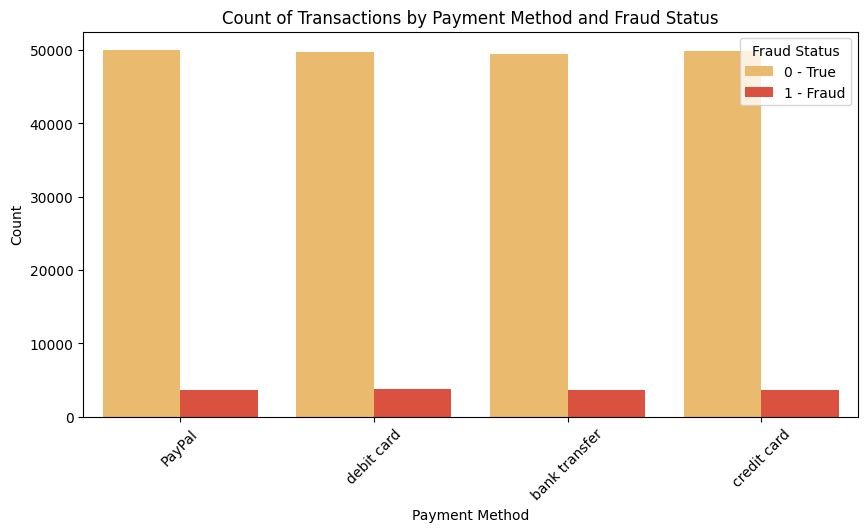

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Payment_Method", hue="Is_Fraudulent", data=df, palette="YlOrRd")
plt.title("Count of Transactions by Payment Method and Fraud Status")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Fraud Status", labels=["0 - True", "1 - Fraud"])
plt.show()

**Insights** There is nothing suspicious with payment method, all payment methods have almost equal number of fraud, we cannot conculde anything solid from this visual.

# Feature Engineering - One hot encoding

In [ ]:
def encode_source(x):
    if x == "SEO":
        return 0
    elif x == "Ads":
        return 1
    elif x == "Direct":
        return 2
    else:
        return -1

def encode_browser(x):
    if x == "Chrome":
        return 0
    elif x == "IE":
        return 1
    elif x == "FireFox":
        return 2
    elif x == "Safari":
        return 3
    elif x == "Opera":
        return 4
    else:
        return -1

def encode_payment_method(x):
    if x == "PayPal":
        return 0
    elif x == "credit card":
        return 1
    elif x == "debit card":
        return 2
    elif x == "bank transfer":
        return 3
    else:
        return -1

def encode_product_category(x):
    if x == "electronics":
        return 0
    elif x == "health & beauty":
        return 1
    elif x == "clothing":
        return 2
    elif x == "toys & games":
        return 3
    elif x == "home & garden":
        return 4
    else:
        return -1

def encode_device_used(x):
    if x == "tablet":
        return 0
    elif x == "mobile":
        return 1
    elif x == "desktop":
        return 2
    else:
        return -1

def encode_name_of_day(x):
    if x == "Monday":
        return 0
    elif x == "Tuesday":
        return 1
    elif x == "Wednesday":
        return 2
    elif x == "Thursday":
        return 3
    elif x == "Friday":
        return 4
    elif x == "Saturday":
        return 5
    elif x == "Sunday":
        return 6
    else:
        return -1

# Applying the mapping functions
df['source_encoded'] = df['source'].apply(encode_source)
df['browser_encoded'] = df['browser'].apply(encode_browser)
df['Payment_Method_encoded'] = df['Payment_Method'].apply(encode_payment_method)
df['Product_Category_encoded'] = df['Product_Category'].apply(encode_product_category)
df['Device_Used_encoded'] = df['Device_Used'].apply(encode_device_used)
df['name_of_day_encoded'] = df['name_of_day'].apply(encode_name_of_day)

In [ ]:
df.head()

,Transaction_Amount,Customer_Age,Account_Age_Days,Transaction_Hour,source,browser,Payment_Method,Product_Category,Quantity,Device_Used,...,month,year,name_of_day,Transaction_Amount_log,source_encoded,browser_encoded,Payment_Method_encoded,Product_Category_encoded,Device_Used_encoded,name_of_day_encoded
0,45.00,37,35,11,Ads,Chrome,PayPal,electronics,5,tablet,...,5,2015,Thursday,3.828641,1,0,0,0,0,3
1,15.00,33,44,3,Direct,FireFox,debit card,health & beauty,5,tablet,...,4,2015,Friday,2.772589,2,2,2,1,0,4
2,54.00,19,44,23,SEO,Opera,debit card,health & beauty,1,mobile,...,8,2015,Monday,4.007333,0,4,2,1,1,0
3,234.42,23,107,17,Ads,Chrome,bank transfer,electronics,5,tablet,...,3,2024,Sunday,5.461371,1,0,3,0,0,6
5,64.00,34,11,22,Ads,Chrome,bank transfer,health & beauty,5,tablet,...,3,2015,Sunday,4.174387,1,0,3,1,0,6


In [ ]:
# Dropping all the columns that are not needed any more:
df = df.drop(columns=["source", "browser", "Payment_Method", "Product_Category", "Device_Used", "name_of_day", "Transaction_Amount"])

In [ ]:
df.head()

,Customer_Age,Account_Age_Days,Transaction_Hour,Quantity,Is_Fraudulent,day,month,year,Transaction_Amount_log,source_encoded,browser_encoded,Payment_Method_encoded,Product_Category_encoded,Device_Used_encoded,name_of_day_encoded
0,37,35,11,5,0,28,5,2015,3.828641,1,0,0,0,0,3
1,33,44,3,5,1,3,4,2015,2.772589,2,2,2,1,0,4
2,19,44,23,1,0,31,8,2015,4.007333,0,4,2,1,1,0
3,23,107,17,5,0,10,3,2024,5.461371,1,0,3,0,0,6
5,34,11,22,5,0,22,3,2015,4.174387,1,0,3,1,0,6


### Heat Map - Check for Correlation

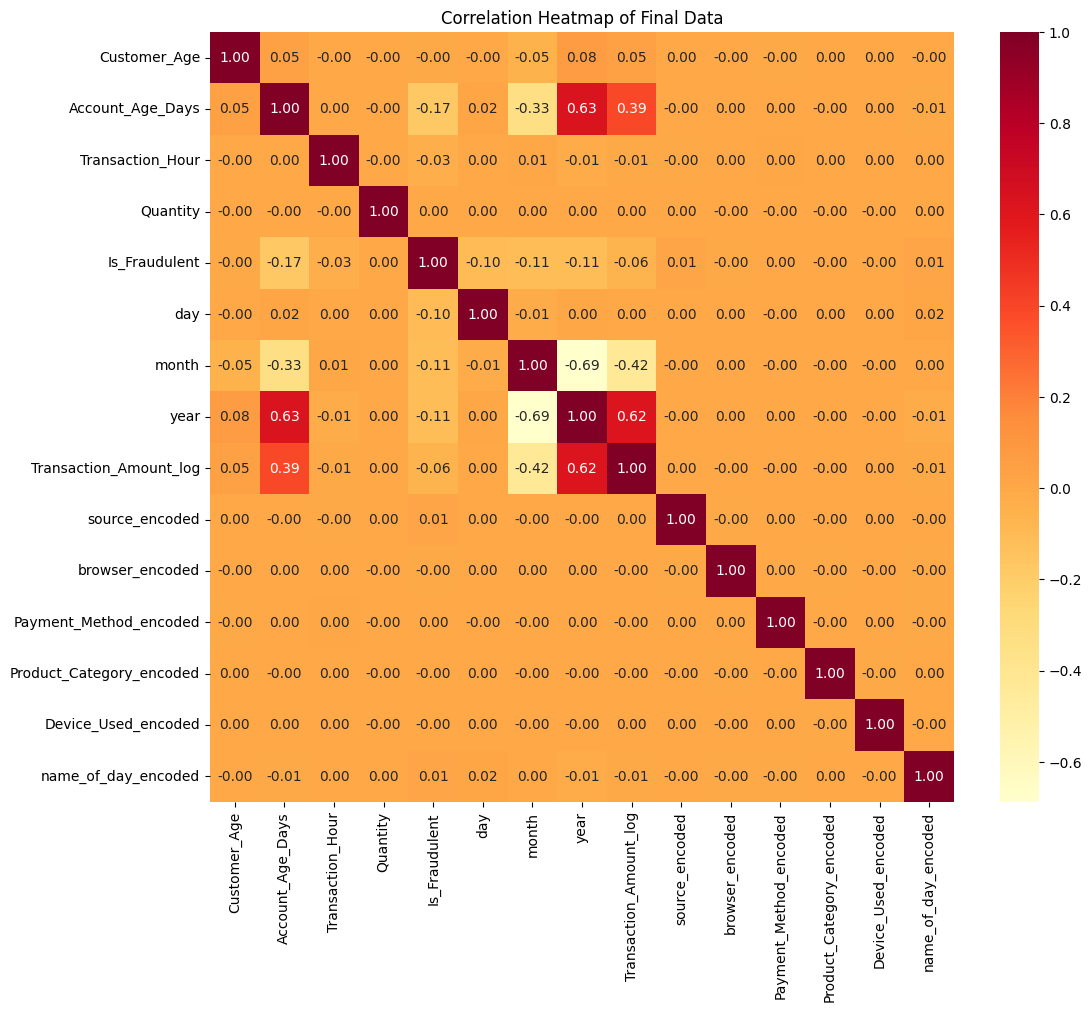

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))

# Draw the heatmap with the 'YlOrRd' colormap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlOrRd")

plt.title("Correlation Heatmap of Final Data")
plt.show()

**Insights** - We have no correlation in most of the variables, Which is a good sign and our data is prepared for modelling

In [ ]:
# continue to analyze the data

def clean_data(df):
    '''
    This function contains all the operation
    needed to perform on the evaluating dataset.
    '''
    # remove Null values
    df = df.dropna()
    # remove duplicate rows
    df = df.drop_duplicates()

    df = df.rename(columns={
    'Transaction.Date': 'Transaction_Date',
    'Transaction.Amount': 'Transaction_Amount',
    'Customer.Age': 'Customer_Age',
    'Account.Age.Days': 'Account_Age_Days',
    'Transaction.Hour': 'Transaction_Hour',
    'Payment.Method': 'Payment_Method',
    'Product.Category': 'Product_Category',
    'Device.Used': 'Device_Used',
    'Is.Fraudulent': 'Is_Fraudulent'
    })

    List_of_numerics = ['Transaction_Amount', 'Customer_Age', 'Account_Age_Days', 'Quantity', 'Transaction_Hour']

    # Finding Q1, Q3 and IQR for 'transaction amount', we will remove outliers to avoid any baisness in our predictions.

    Q1_tAmount =  df['Transaction_Amount'].quantile(0.25) #25%
    Q3_tAmount = df['Transaction_Amount'].quantile(0.75) # 75%
    IQR_tAmount = Q3_tAmount - Q1_tAmount


    # Finding Q1, Q3 and IQR for 'Customer_Age', we will remove outliers to avoid any baisness in our predictions.

    Q1_age =  df['Customer_Age'].quantile(0.25) #25%
    Q3_age = df['Customer_Age'].quantile(0.75) # 75%
    IQR_age = Q3_age - Q1_age

    # Removing outliers from our data set

    outliers_tAmount = (df['Transaction_Amount'] >= Q1_tAmount - 1.5 * IQR_tAmount) & (df['Transaction_Amount'] <= Q3_tAmount + 1.5 *IQR_tAmount)
    df = df.loc[outliers_tAmount]

    outliers_age = (df['Customer_Age'] >= Q1_age - 1.5 * IQR_age) & (df['Customer_Age'] <= Q3_age + 1.5 *IQR_age)
    df = df.loc[outliers_age]


    # Converting datatype of "Transaction_Date" column using mixed formats
    df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='mixed', dayfirst=True)

    # Creating new columns: extracting day, month, year, and the name of the day from Transaction_Date
    df['day'] = df['Transaction_Date'].dt.day
    df['month'] = df['Transaction_Date'].dt.month
    df['year'] = df['Transaction_Date'].dt.year
    df['name_of_day'] = df['Transaction_Date'].dt.day_name()


    # Dropping the 'Transaction_Date' column

    df.drop('Transaction_Date',axis=1,inplace=True)

    def encode_source(x):
        if x == "SEO":
            return 0
        elif x == "Ads":
            return 1
        elif x == "Direct":
            return 2
        else:
            return -1

    def encode_browser(x):
        if x == "Chrome":
            return 0
        elif x == "IE":
            return 1
        elif x == "FireFox":
            return 2
        elif x == "Safari":
            return 3
        elif x == "Opera":
            return 4
        else:
            return -1

    def encode_payment_method(x):
        if x == "PayPal":
            return 0
        elif x == "credit card":
            return 1
        elif x == "debit card":
            return 2
        elif x == "bank transfer":
            return 3
        else:
            return -1

    def encode_product_category(x):
        if x == "electronics":
            return 0
        elif x == "health & beauty":
            return 1
        elif x == "clothing":
            return 2
        elif x == "toys & games":
            return 3
        elif x == "home & garden":
            return 4
        else:
            return -1

    def encode_device_used(x):
        if x == "tablet":
            return 0
        elif x == "mobile":
            return 1
        elif x == "desktop":
            return 2
        else:
            return -1

    def encode_name_of_day(x):
        if x == "Monday":
            return 0
        elif x == "Tuesday":
            return 1
        elif x == "Wednesday":
            return 2
        elif x == "Thursday":
            return 3
        elif x == "Friday":
            return 4
        elif x == "Saturday":
            return 5
        elif x == "Sunday":
            return 6
        else:
            return -1

    # Applying the mapping functions
    df['source_encoded'] = df['source'].apply(encode_source)
    df['browser_encoded'] = df['browser'].apply(encode_browser)
    df['Payment_Method_encoded'] = df['Payment_Method'].apply(encode_payment_method)
    df['Product_Category_encoded'] = df['Product_Category'].apply(encode_product_category)
    df['Device_Used_encoded'] = df['Device_Used'].apply(encode_device_used)
    df['name_of_day_encoded'] = df['name_of_day'].apply(encode_name_of_day)

    return df



# Data Modelling

### Splitting the data into Train test


In [ ]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    # Create a shuffled index array
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    # Determine the size of the test set
    test_set_size = int(len(X) * test_size)

    # Split the indices for test and train sets
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]

    # Use .iloc to split the DataFrame and Series
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

    return X_train, X_test, y_train, y_test

# Separating features and target variable
X = df.drop("Is_Fraudulent", axis=1)
y = df["Is_Fraudulent"]

# Apply the custom train/test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print out the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (171129, 14)
X_test shape: (42782, 14)
y_train shape: (171129,)
y_test shape: (42782,)


### SMOTE - To counter Imbalance

In [ ]:
# 1) Separate features (X) and target (y)
X = df.drop('Is_Fraudulent', axis=1)
y = df['Is_Fraudulent']

# 2) Custom train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3) Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution before and after SMOTE
print("Original training set distribution:")
print(y_train.value_counts())

print("\nResampled training set distribution:")
print(pd.Series(y_train_res).value_counts())

Original training set distribution:
Is_Fraudulent
0    159370
1     11759
Name: count, dtype: int64

Resampled training set distribution:
Is_Fraudulent
0    159370
1    159370
Name: count, dtype: int64


# Logistic Regression

In [ ]:
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the predicted classes

train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)


In [ ]:
train_class_preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Evaluating metics for Logistic Regression

In [ ]:
# Generate predictions for train and test sets
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, train_class_preds)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on the training data is:", train_accuracy)
print("The accuracy on the testing data is:", test_accuracy)
print('--'*20)

# Confusion matrices
cm_train = confusion_matrix(y_train, train_class_preds)
cm_test = confusion_matrix(y_test, test_class_preds)

print("Confusion Matrix (Training):")
print(cm_train)
print()
print("Confusion Matrix (Testing):")
print(cm_test)
print('--'*20)

# Classification reports
train_report = classification_report(y_train, train_class_preds)
test_report = classification_report(y_test, test_class_preds)

print("Classification Report (Training):")
print(train_report)
print()
print("Classification Report (Testing):")
print(test_report)
print('--'*20)

# ROC AUC scores
# For binary classification, we take the predicted probabilities for the positive class ([, 1])
train_prob_preds = clf.predict_proba(X_train)[:, 1]
test_prob_preds = clf.predict_proba(X_test)[:, 1]

train_roc_auc_score = roc_auc_score(y_train, train_prob_preds)
test_roc_auc_score = roc_auc_score(y_test, test_prob_preds)

print("ROC AUC Score (Training):", train_roc_auc_score)
print("ROC AUC Score (Testing):", test_roc_auc_score)

The accuracy on the training data is: 0.9319460757674035
The accuracy on the testing data is: 0.931723622084054
----------------------------------------
Confusion Matrix (Training):
[[159369      1]
 [ 11645    114]]

Confusion Matrix (Testing):
[[39829     0]
 [ 2921    32]]
----------------------------------------
Classification Report (Training):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    159370
           1       0.99      0.01      0.02     11759

    accuracy                           0.93    171129
   macro avg       0.96      0.50      0.49    171129
weighted avg       0.94      0.93      0.90    171129


Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     39829
           1       1.00      0.01      0.02      2953

    accuracy                           0.93     42782
   macro avg       0.97      0.51      0.49     42782
weighted avg   

# Conclusion

F1 score for the minority (fraud) class is very low (around 0.02). This tells that the model is performing poorly on the fraud class from both a precision and recall standpoint, in other words, it's rarely predicting fraud and when it does, it's not very accurate.

There is big room for improvement in Recall.

Being a Binary choice we went with Logistic Regression, In the next part of the project we will try to increase the f1-score of our model and try other

Once you have completed your analysis and are ready to submit the assessment you should export the trained model file (**only one model will be accepted**). The model file should be saved as a pickle file (.pkl). The model file should be saved in the same directory as the notebook. Once you have saved the model file you should upload both the notebook and the model file to the assessment submission portal. Please ensure you provide the model file name as a variable, see example below.

In [ ]:
## Do not delete this cell ##

import pickle

# Save your trained model (named 'clf') as 'clf.pkl'
filename = 'clf.pkl'

with open(filename, "wb") as f:
    pickle.dump(clf, f)

print(f"Model has been saved to '{filename}'.")

Model has been saved to 'clf.pkl'.


### Assessment Evaluation

This is required for the assessment to be marked. Groups should specify any data processing steps that are required to run the model in the cell below. This may include the installation of additional libraries, loading of the data, and any additional processing steps required to run the model. The model should be saved to a file called 'model.pkl' in the same directory as the notebook. The model file should be loaded and tested in the cell below to ensure it runs correctly. The model should be loaded and tested using the following code:

In [ ]:
## Do not delete this cell ##

# load the evaluation data
import pandas as pd

# load the raw data
df_eval_raw = pd.read_csv('evaluation_dataset.csv')


In [ ]:
# groups should add the necessary preprocessing steps to prepare the data for evaluation below



# the final dataset should be saved in a DataFrame called df_eval
df_eval = clean_data(df_eval_raw)

In [ ]:
## Do not delete this cell ##

# Load the model and evaluate it on the evaluation data

# load the pickle model
with open(filename, "rb") as f:
    eval_model = pickle.load(f) # do not change the name of the model variable

# test the model on the evaluation data
y_eval = eval_model.predict(df_eval.drop('Is.Fraudulent', axis=1))

# calculate the f1 score
f1_eval = f1_score(df_eval['Is.Fraudulent'], y_eval)

# print the f1 score
print(f'F1 Score: {f1_eval:.3f}')